실습과제1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#공부시간 X와 성적 Y의 리스트
data = [[2, 81], [4, 93], [6, 91], [8, 97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

In [3]:
def mse(y_hat, y):
  return ((y_hat - y) ** 2).mean()

In [30]:
#리스트로 되어 있는 x와 y값을 넘파이 배열로 바꾸기(인덱스를 주어 하나씩 불러와 계산이 가능해 지도록 하기 위함)
x_data = np.array(x)
y_data = np.array(y)

# 기울기 a와 절편 b의 값을 초기화
a = 0
b = 0

#학습률
lr = 0.08

#몇 번 반복될지를 설정
epochs = 2001

#경사 하강법을 시작
for i in range(epochs): # epoch 수 만큼 반복
    y_hat = a * x_data + b  #y를 구하는 식
    error = y_data - y_hat  #오차를 구하는 식
    a_diff = -(1/len(x_data)) * sum(x_data * (error)) # 오차함수를 a로 미분한 값
    b_diff = -(1/len(x_data)) * sum(error)  # 오차함수를 b로 미분한 값
    a = a - lr * a_diff  # 학습률을 곱해 기존의 a값을 업데이트
    b = b - lr * b_diff  # 학습률을 곱해 기존의 b값을 업데이트

    current_mse = mse(y_hat, y_data)

    # MSE 값이 이전 값보다 증가하면 학습률(lr) 0.01 감소
    if i > 0 and current_mse > prev_mse:
        lr -= 0.01

    # 이전 MSE 값을 갱신
    prev_mse = current_mse

    if i % 400 == 0:    # 400번 반복될 때마다 현재의 a값, b값을 출력
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))
        print("LR: %.05f, a_diff: %.02f, b_diff: %.02f, MSE: %.10f" % (lr, a_diff, b_diff, current_mse))

epoch=0, 기울기=37.1200, 절편=7.2400
LR: 0.08000, a_diff: -464.00, b_diff: -90.50, MSE: 8225.0000000000
epoch=400, 기울기=2.7827, 절편=76.1194
LR: 0.05000, a_diff: 0.08, b_diff: -0.47, MSE: 9.7058819523
epoch=800, 기울기=2.3186, 절편=78.8890
LR: 0.05000, a_diff: 0.00, b_diff: -0.02, MSE: 8.3020885172
epoch=1200, 기울기=2.3007, 절편=78.9957
LR: 0.05000, a_diff: 0.00, b_diff: -0.00, MSE: 8.3000031026
epoch=1600, 기울기=2.3000, 절편=78.9998
LR: 0.05000, a_diff: 0.00, b_diff: -0.00, MSE: 8.3000000046
epoch=2000, 기울기=2.3000, 절편=79.0000
LR: 0.05000, a_diff: 0.00, b_diff: -0.00, MSE: 8.3000000000


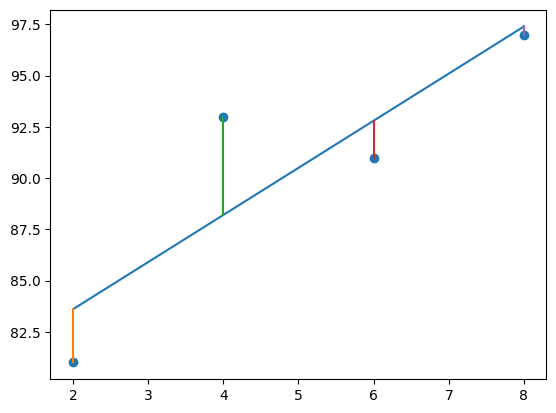

In [29]:
# 앞서 구한 기울기와 절편을 이용해 그래프 그리기
y_pred = a * x_data + b
plt.scatter(x, y)
plt.plot([min(x_data), max(x_data)], [min(y_pred), max(y_pred)])
plt.plot([x_data, x_data], [y_pred, y_data])
plt.show()